In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt


In [3]:
covid_data = "Datasets/COVID19_line_list_data.csv"

#Reading the data files in
covid_data = pd.read_csv(covid_data)
covid_data

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset_date,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/20,0.0,1/11/20,12/29/19,1/4/20,1,0.0,0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/20,0.0,1/15/20,NaN,1/12/20,0,1.0,0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/20,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/20,0.0,1/17/20,NaN,1/3/20,0,1.0,0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/20,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/20,NaN,NaN,1,0.0,0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/20,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/20,NaN,NaN,0,0.0,0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1081,2.0,2/25/20,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,0,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1080,1082,1.0,2/24/20,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,0,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1081,1083,1.0,2/26/20,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/20,0,0.0,0,0,0,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1082,1084,1.0,2/25/20,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/20,2/21/20,0,0.0,0,0,0,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [4]:
data = covid_data[['age', 'gender', 'location', 'country','recovered', 'death']]
data

,age,gender,location,country,recovered,death
0,66.0,male,"Shenzhen, Guangdong",China,0,0
1,56.0,female,Shanghai,China,0,0
2,46.0,male,Zhejiang,China,0,0
3,60.0,female,Tianjin,China,0,0
4,58.0,male,Tianjin,China,0,0
...,...,...,...,...,...,...
1079,24.0,NaN,Innsbruck,Austria,0,0
1080,35.0,NaN,Afghanistan,Afghanistan,0,0
1081,NaN,male,Algeria,Algeria,0,0
1082,NaN,male,Croatia,Croatia,0,0


In [5]:
data_edit = data.dropna(subset = ['age'])

In [6]:
complete_data = data_edit.fillna({'gender': 'undisclosed'})
complete_data

,age,gender,location,country,recovered,death
0,66.0,male,"Shenzhen, Guangdong",China,0,0
1,56.0,female,Shanghai,China,0,0
2,46.0,male,Zhejiang,China,0,0
3,60.0,female,Tianjin,China,0,0
4,58.0,male,Tianjin,China,0,0
...,...,...,...,...,...,...
1051,45.0,female,Lebanon,Lebanon,0,0
1078,24.0,undisclosed,Innsbruck,Austria,0,0
1079,24.0,undisclosed,Innsbruck,Austria,0,0
1080,35.0,undisclosed,Afghanistan,Afghanistan,0,0


In [7]:
# What age group has a higher recovery rate
# Which gender has a higher chance of recovery  
#Identifying the oldest and youngest in age to determine how we are going to bin the ages
complete_data.max()['age']

complete_data.min()['age']

0.25

In [8]:
bin1 = [0, 9.9, 19.9, 29.9, 39.9, 49.9, 59.9, 69.9, 1000]
labels = ['<10', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70+']

complete_data['age_bin'] = pd.cut(complete_data['age'], bin1, labels = labels)
complete_data.loc[complete_data['recovered'] == 0, 'recovered'] = 'not recovered'
complete_data.loc[complete_data['recovered'] == 1, 'recovered'] = 'recovered'
complete_data.loc[complete_data['death'] == 1, 'death'] = 'dead'
complete_data.loc[complete_data['death'] == 0, 'death'] = 'alive'
complete_data

,age,gender,location,country,recovered,death,age_bin
0,66.0,male,"Shenzhen, Guangdong",China,not recovered,alive,60 to 69
1,56.0,female,Shanghai,China,not recovered,alive,50 to 59
2,46.0,male,Zhejiang,China,not recovered,alive,40 to 49
3,60.0,female,Tianjin,China,not recovered,alive,60 to 69
4,58.0,male,Tianjin,China,not recovered,alive,50 to 59
...,...,...,...,...,...,...,...
1051,45.0,female,Lebanon,Lebanon,not recovered,alive,40 to 49
1078,24.0,undisclosed,Innsbruck,Austria,not recovered,alive,20 to 29
1079,24.0,undisclosed,Innsbruck,Austria,not recovered,alive,20 to 29
1080,35.0,undisclosed,Afghanistan,Afghanistan,not recovered,alive,30 to 39


In [9]:
bar_graph_rec = complete_data.groupby(['age_bin', 'recovered']).count()['age']
bar_graph_rec = pd.DataFrame(bar_graph_rec).reset_index()
bargraph_age = bar_graph_rec.pivot(index = 'age_bin', columns = 'recovered', values ='age')
# reset_index().\

#rename(columns={'0': 'Not Recovered', '1': 'Recovered'})
bargraph_age

recovered,not recovered,recovered
age_bin,,
<10,9,10
10 to 19,10,3
20 to 29,78,17
30 to 39,116,33
40 to 49,99,28
50 to 59,152,31
60 to 69,121,15
70+,113,8


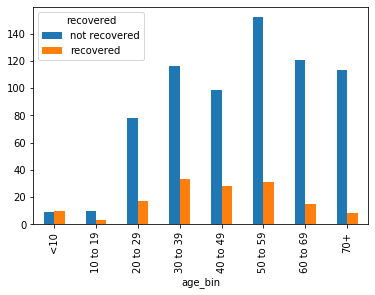

In [10]:
bargraph_age.plot(kind='bar')
plt.show()

In [11]:
bar_graph_data = complete_data.groupby(['age_bin', 'death']).count()['age']
bar_graph_data = pd.DataFrame(bar_graph_data).reset_index()
bargraph_death = bar_graph_data.pivot(index = 'age_bin', columns = 'death', values ='age')
# reset_index().\

#rename(columns={'0': 'Not Recovered', '1': 'Recovered'})
bargraph_death

death,alive,dead
age_bin,,
<10,19.0,NaN
10 to 19,13.0,NaN
20 to 29,95.0,NaN
30 to 39,146.0,3.0
40 to 49,124.0,3.0
50 to 59,175.0,8.0
60 to 69,121.0,15.0
70+,92.0,29.0


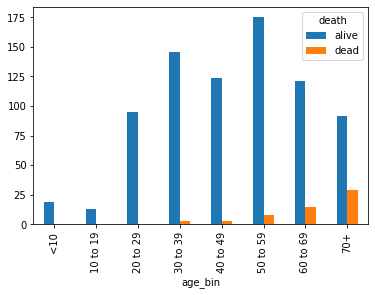

<Figure size 432x288 with 0 Axes>

In [18]:
bargraph_death.plot(kind='bar')
plt.show()
plt.savefig("alivedeath.png") # save as png

In [13]:
death_rec_df = bargraph_age.join(bargraph_death, how='inner')
death_rec_df

,not recovered,recovered,alive,dead
age_bin,,,,
<10,9,10,19.0,NaN
10 to 19,10,3,13.0,NaN
20 to 29,78,17,95.0,NaN
30 to 39,116,33,146.0,3.0
40 to 49,99,28,124.0,3.0
50 to 59,152,31,175.0,8.0
60 to 69,121,15,121.0,15.0
70+,113,8,92.0,29.0


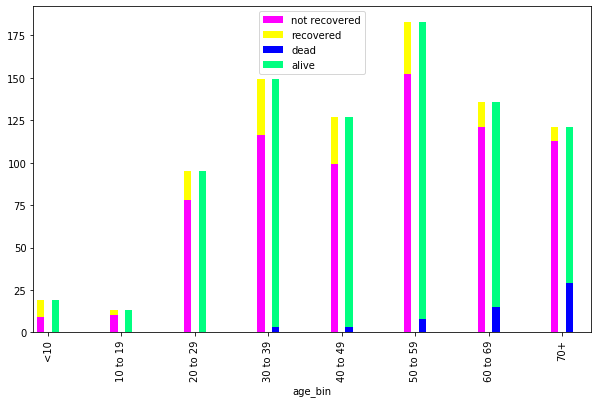

<Figure size 432x288 with 0 Axes>

In [14]:
#matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize = (10,6))
death_rec_df[['not recovered', 'recovered']].plot.bar(stacked=True, width=0.1, position=1.5, colormap="spring",ax=ax, alpha=1)
death_rec_df[['dead', 'alive']].plot.bar(stacked=True, width=0.1, position=-0.5, colormap="winter", ax=ax, alpha=1)

plt.legend(loc="upper center")
plt.show()
plt.savefig("aliverecovered.png") # save as png

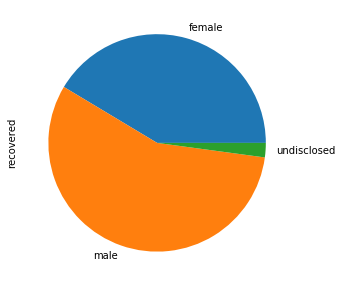

In [17]:
pie_data_rec = complete_data.groupby(['gender']).count()['recovered']
pie_data_rec

pie_chart = pie_data_rec.plot.pie(y='gender', figsize=(5, 5))